#Goal

#Project
- **서울 특별시 공유 자전거 대여 수요를 예측하는 모델**

![프로젝트 사](https://seoulsolution.kr/sites/default/files/images/%EB%94%B0%EB%A6%89%EC%9D%B41.JPG)

### ENV

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import lightgbm as lgb


In [2]:
# !pip install dtale

In [3]:
# import dtale
# import dtale.app as dtale_app

### Data Dictionary
| 변수명 | 정의 |  |  |  |
| :-: | :-: | :-: | :-: | :-: |
| ID | 샘플 ID |  |  |  |
| Hour | 당일 시간대(0, 1, 2 .... , 23) |  |  |  |
| Temperature | 기온(°C) |  |  |  |
| Humidity | 습도(%) |  |  |  |
| Wind speed | 풍속(m/s) |  |  |  |
| Visibility | 가시거리(10m) |  |  |  |
| Dew point temperature | 이슬점(상대습도 관련)(°C) |  |  |  |
| Solar Radiation | 태양복사지수(MJ/㎡) |  |  |  |
| Rainfall | 강수량(mm) |  |  |  |
| Snowfall | 강설량(cm) |  |  |  |
| Seasons_Autumn | 계절 더미 변수_가을(0: 가을 아님, 1: 가을) |  |  |  |
| Seasons_Spring |  계절 더미 변수_봄(0: 봄 아님, 1: 봄) |  |  |  |
| Seasons_Summer | 계절 더미 변수_여름(0: 여름 아님, 1: 여름) |  |  |  |
| Seasons_Winter | 계절 더미 변수_겨울(0: 겨울 아님, 1: 겨울) |  |  |  |
| Holiday | 휴일 여부(0: 휴일 아님, 1: 휴일) |  |  |  |
| Functional Hours | 운영 시간 여부(0: 운영 시간 아님, 1: 운영 시간) |  |  |  |


### Data Load

In [4]:
# Google Drive 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 구글 드라이브 파일의 공유 링크(URL)
url_x_train = '/content/drive/MyDrive/Colab Notebooks/머신러닝/Term Project/data/x_train.csv'
url_y_train = '/content/drive/MyDrive/Colab Notebooks/머신러닝/Term Project/data/y_train.csv'
url_x_test = '/content/drive/MyDrive/Colab Notebooks/머신러닝/Term Project/data/x_test.csv'
url_sample_sub = '/content/drive/MyDrive/Colab Notebooks/머신러닝/Term Project/data/sample_submission.csv'
# CSV 파일을 데이터프레임으로 불러오기
x_train = pd.read_csv(url_x_train)
y_train = pd.read_csv(url_y_train)
x_test = pd.read_csv(url_x_test)
sample_submission = pd.read_csv(url_sample_sub)

### 분포 확인 시각화

In [6]:
x_train.shape

(7008, 16)

In [7]:
x_train

,ID,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday,Functional Hours
0,0,6,-15.7,29,2.5,2000,-29.7,0.00,0.0,0.9,0.0,0.0,0.0,1.0,0.0,1.0
1,1,15,6.8,50,4.1,660,-2.9,0.56,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,6,1.1,66,0.9,1550,-4.5,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,11,6.0,66,0.9,573,0.1,1.37,0.0,2.3,1.0,0.0,0.0,0.0,0.0,1.0
4,4,17,18.2,43,2.3,1925,5.4,0.68,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,7003,18,-7.8,32,4.5,2000,-21.6,0.02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7004,7004,0,25.9,76,1.3,984,21.3,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7005,7005,5,18.1,73,0.5,1182,13.1,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7006,7006,7,14.1,69,1.1,1692,8.4,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [8]:
y_train.shape

(7008, 2)

In [9]:
y_train

,ID,Rented Bike Count
0,0,71
1,1,545
2,2,108
3,3,522
4,4,1990
...,...,...
7003,7003,437
7004,7004,1068
7005,7005,282
7006,7006,786


In [10]:
y_train = y_train.drop(['ID'],axis=1)

In [11]:
y_train.shape

(7008, 1)

In [12]:
merged_data = pd.concat([x_train, y_train], axis=1)

# 결과 출력
print(merged_data)

        ID  Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0     6        -15.7        29         2.5        2000   
1        1    15          6.8        50         4.1         660   
2        2     6          1.1        66         0.9        1550   
3        3    11          6.0        66         0.9         573   
4        4    17         18.2        43         2.3        1925   
...    ...   ...          ...       ...         ...         ...   
7003  7003    18         -7.8        32         4.5        2000   
7004  7004     0         25.9        76         1.3         984   
7005  7005     5         18.1        73         0.5        1182   
7006  7006     7         14.1        69         1.1        1692   
7007  7007    18         33.7        62         3.2        1082   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0                     -29.7             0.00       0.0       0.9   
1                      -2.9             0.56       0.0     

In [13]:
merged_data.shape

(7008, 17)

In [14]:
y_train

,Rented Bike Count
0,71
1,545
2,108
3,522
4,1990
...,...
7003,437
7004,1068
7005,282
7006,786


In [15]:
x_test

,ID,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday,Functional Hours
0,0,0,11.8,59,2.4,1535,4.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,3,18.6,78,0.8,1997,14.6,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,19,1.3,65,1.1,1122,-4.5,0.00,0.0,2.7,0.0,0.0,0.0,1.0,0.0,1.0
3,3,15,5.4,20,2.2,1890,-15.8,0.80,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,1,12.4,94,1.3,307,11.4,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1747,20,17.3,53,1.9,2000,7.6,0.01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1748,1748,8,-9.7,65,0.8,1508,-15.0,0.02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1749,1749,14,34.4,65,1.8,960,26.8,1.75,0.2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1750,1750,2,2.1,28,0.4,1981,-14.5,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# x_train 결측치 확인
print(x_train.isnull())

         ID   Hour  Temperature  Humidity  Wind speed  Visibility  \
0     False  False        False     False       False       False   
1     False  False        False     False       False       False   
2     False  False        False     False       False       False   
3     False  False        False     False       False       False   
4     False  False        False     False       False       False   
...     ...    ...          ...       ...         ...         ...   
7003  False  False        False     False       False       False   
7004  False  False        False     False       False       False   
7005  False  False        False     False       False       False   
7006  False  False        False     False       False       False   
7007  False  False        False     False       False       False   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0                     False            False     False     False   
1                     False        

In [17]:
print(y_train.isnull())

      Rented Bike Count
0                 False
1                 False
2                 False
3                 False
4                 False
...                 ...
7003              False
7004              False
7005              False
7006              False
7007              False

[7008 rows x 1 columns]


In [18]:
print(x_test.isnull())

         ID   Hour  Temperature  Humidity  Wind speed  Visibility  \
0     False  False        False     False       False       False   
1     False  False        False     False       False       False   
2     False  False        False     False       False       False   
3     False  False        False     False       False       False   
4     False  False        False     False       False       False   
...     ...    ...          ...       ...         ...         ...   
1747  False  False        False     False       False       False   
1748  False  False        False     False       False       False   
1749  False  False        False     False       False       False   
1750  False  False        False     False       False       False   
1751  False  False        False     False       False       False   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0                     False            False     False     False   
1                     False        

In [19]:
x_train.describe()

,ID,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday,Functional Hours
count,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,3503.500000,11.474600,12.916110,58.239869,1.729466,1435.503853,4.114155,0.571916,0.146047,0.073216,0.245434,0.252568,0.254138,0.247860,0.047374,0.966182
std,2023.179676,6.922325,11.965449,20.392228,1.034256,607.465047,13.072395,0.873096,1.053053,0.428825,0.430375,0.434517,0.435407,0.431801,0.212454,0.180775
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1751.750000,5.000000,3.500000,42.000000,0.900000,941.750000,-4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3503.500000,11.000000,13.700000,57.000000,1.500000,1691.000000,5.300000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5255.250000,17.000000,22.600000,74.000000,2.300000,2000.000000,14.800000,0.940000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,7007.000000,23.000000,39.400000,98.000000,7.300000,2000.000000,27.200000,3.520000,29.500000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
merged_data.describe

<bound method NDFrame.describe of         ID  Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0     6        -15.7        29         2.5        2000   
1        1    15          6.8        50         4.1         660   
2        2     6          1.1        66         0.9        1550   
3        3    11          6.0        66         0.9         573   
4        4    17         18.2        43         2.3        1925   
...    ...   ...          ...       ...         ...         ...   
7003  7003    18         -7.8        32         4.5        2000   
7004  7004     0         25.9        76         1.3         984   
7005  7005     5         18.1        73         0.5        1182   
7006  7006     7         14.1        69         1.1        1692   
7007  7007    18         33.7        62         3.2        1082   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0                     -29.7             0.00       0.0       0.9   
1                      -2

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind speed'}>,
        <Axes: title={'center': 'Visibility'}>,
        <Axes: title={'center': 'Dew point temperature'}>,
        <Axes: title={'center': 'Solar Radiation'}>],
       [<Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Snowfall'}>,
        <Axes: title={'center': 'Seasons_Autumn'}>,
        <Axes: title={'center': 'Seasons_Spring'}>],
       [<Axes: title={'center': 'Seasons_Summer'}>,
        <Axes: title={'center': 'Seasons_Winter'}>,
        <Axes: title={'center': 'Holiday'}>,
        <Axes: title={'center': 'Functional Hours'}>],
       [<Axes: title={'center': 'Rented Bike Count'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

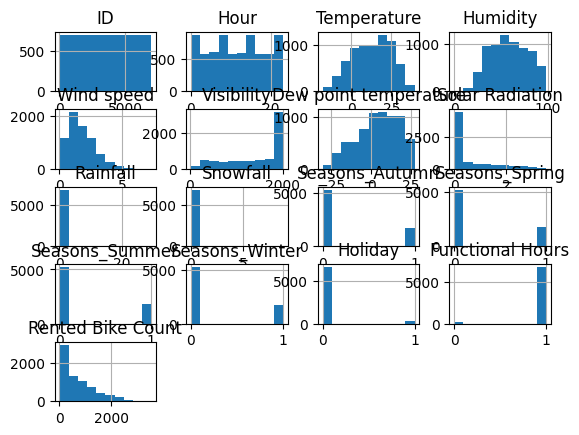

In [21]:
merged_data.hist()

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind speed'}>,
        <Axes: title={'center': 'Visibility'}>,
        <Axes: title={'center': 'Dew point temperature'}>,
        <Axes: title={'center': 'Solar Radiation'}>],
       [<Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Snowfall'}>,
        <Axes: title={'center': 'Seasons_Autumn'}>,
        <Axes: title={'center': 'Seasons_Spring'}>],
       [<Axes: title={'center': 'Seasons_Summer'}>,
        <Axes: title={'center': 'Seasons_Winter'}>,
        <Axes: title={'center': 'Holiday'}>,
        <Axes: title={'center': 'Functional Hours'}>],
       [<Axes: title={'center': 'Rented Bike Count'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

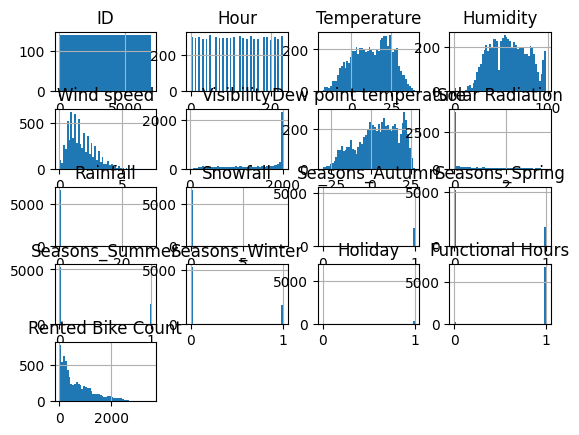

In [22]:
merged_data.hist(bins = 50)

### 데이터 전처리

#### IQR

##### Hour

<Axes: >

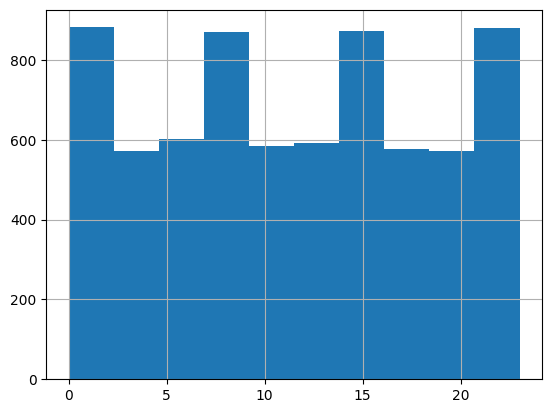

In [23]:
merged_data['Hour'].hist()

<Axes: >

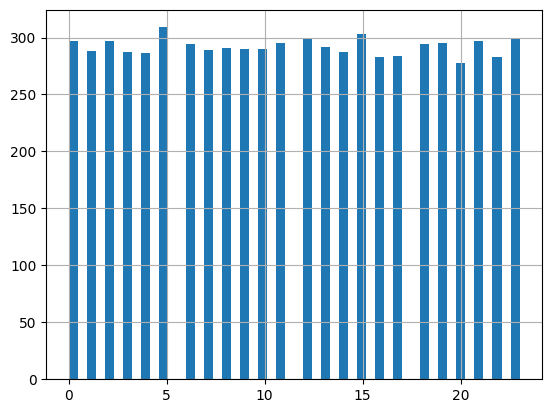

In [24]:
merged_data['Hour'].hist(bins = 50)

#####Temperature

<Axes: >

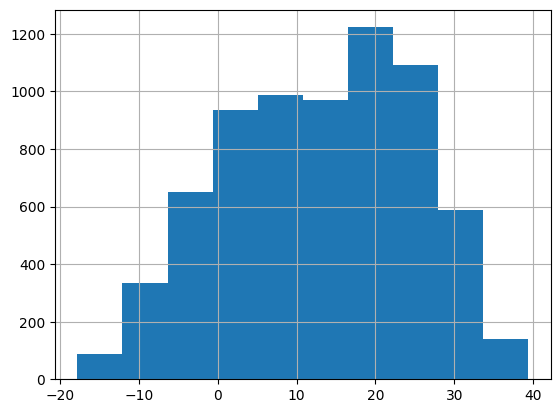

In [25]:
merged_data['Temperature'].hist()

<Axes: >

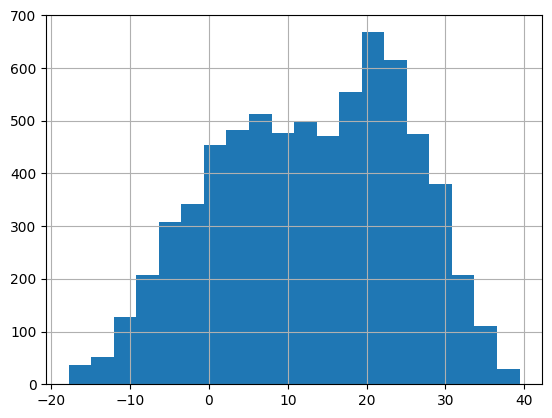

In [26]:
merged_data['Temperature'].hist(bins = 20)

In [27]:
# 이상치 식별을 위한 IQR 계산
Q1 = merged_data['Temperature'].quantile(0.25)
Q3 = merged_data['Temperature'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 식별
threshold = 1.5  # 이상치로 간주할 IQR의 범위
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = merged_data[(merged_data['Temperature'] < lower_bound) | (merged_data['Temperature'] > upper_bound)]
print("이상치:", outliers)

# 이상치 제거
merged_data = merged_data[~((merged_data['Temperature'] < lower_bound) | (merged_data['Temperature'] > upper_bound))]

# 결과 출력
print("제거 후 데이터:")
print(merged_data)

이상치: Empty DataFrame
Columns: [ID, Hour, Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar Radiation, Rainfall, Snowfall, Seasons_Autumn, Seasons_Spring, Seasons_Summer, Seasons_Winter, Holiday, Functional Hours, Rented Bike Count]
Index: []
제거 후 데이터:
        ID  Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0     6        -15.7        29         2.5        2000   
1        1    15          6.8        50         4.1         660   
2        2     6          1.1        66         0.9        1550   
3        3    11          6.0        66         0.9         573   
4        4    17         18.2        43         2.3        1925   
...    ...   ...          ...       ...         ...         ...   
7003  7003    18         -7.8        32         4.5        2000   
7004  7004     0         25.9        76         1.3         984   
7005  7005     5         18.1        73         0.5        1182   
7006  7006     7         14.1        69         1.1 

#####Humidity

<Axes: >

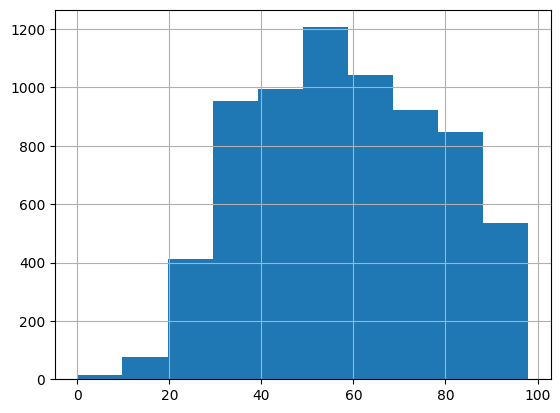

In [28]:
merged_data['Humidity'].hist()

<Axes: >

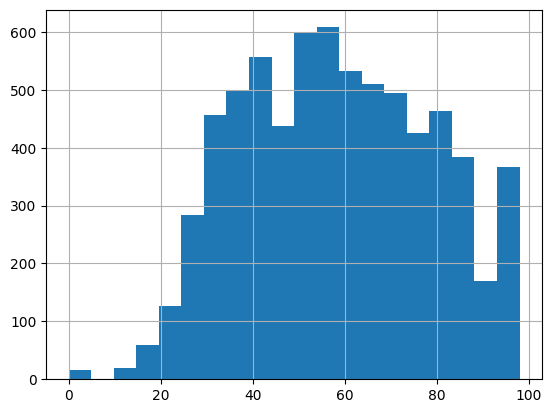

In [29]:
merged_data['Humidity'].hist(bins = 20)

In [30]:
# 이상치 식별을 위한 IQR 계산
Q1 = merged_data['Humidity'].quantile(0.25)
Q3 = merged_data['Humidity'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 식별
threshold = 1.5  # 이상치로 간주할 IQR의 범위
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = merged_data[(merged_data['Humidity'] < lower_bound) | (merged_data['Humidity'] > upper_bound)]
print("이상치:", outliers)

# 이상치 제거
merged_data = merged_data[~((merged_data['Humidity'] < lower_bound) | (merged_data['Humidity'] > upper_bound))]

# 결과 출력
print("제거 후 데이터:")
print(merged_data)

이상치: Empty DataFrame
Columns: [ID, Hour, Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar Radiation, Rainfall, Snowfall, Seasons_Autumn, Seasons_Spring, Seasons_Summer, Seasons_Winter, Holiday, Functional Hours, Rented Bike Count]
Index: []
제거 후 데이터:
        ID  Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0     6        -15.7        29         2.5        2000   
1        1    15          6.8        50         4.1         660   
2        2     6          1.1        66         0.9        1550   
3        3    11          6.0        66         0.9         573   
4        4    17         18.2        43         2.3        1925   
...    ...   ...          ...       ...         ...         ...   
7003  7003    18         -7.8        32         4.5        2000   
7004  7004     0         25.9        76         1.3         984   
7005  7005     5         18.1        73         0.5        1182   
7006  7006     7         14.1        69         1.1 

#####Wind speed

<Axes: >

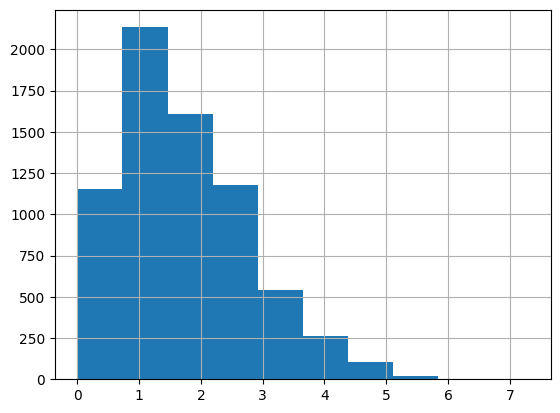

In [31]:
merged_data['Wind speed'].hist()

<Axes: >

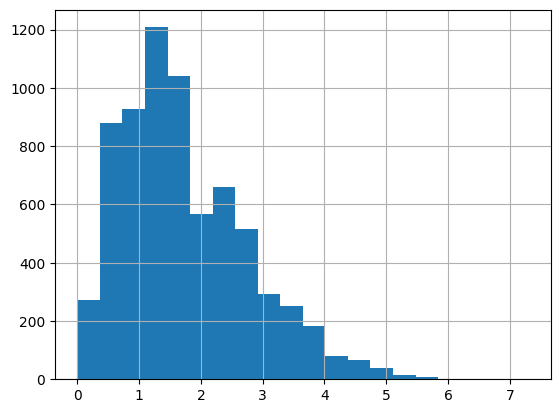

In [32]:
merged_data['Wind speed'].hist(bins = 20)

In [33]:
# 이상치 식별을 위한 IQR 계산
Q1 = merged_data['Wind speed'].quantile(0.25)
Q3 = merged_data['Wind speed'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 식별
threshold = 1.5  # 이상치로 간주할 IQR의 범위
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = merged_data[(merged_data['Wind speed'] < lower_bound) | (merged_data['Wind speed'] > upper_bound)]
print("이상치:", outliers)

# 이상치 제거
merged_data = merged_data[~((merged_data['Wind speed'] < lower_bound) | (merged_data['Wind speed'] > upper_bound))]

# 결과 출력
print("제거 후 데이터:")
print(merged_data)

이상치:         ID  Hour  Temperature  Humidity  Wind speed  Visibility  \
21      21    21         17.5        70         7.3        1634   
158    158    19         19.2        55         5.8        2000   
183    183    23         28.5        62         4.9        1882   
238    238    12         17.9        32         4.6        1874   
318    318    22         -1.0        56         4.7        2000   
...    ...   ...          ...       ...         ...         ...   
6858  6858    16         20.4        25         4.7        1990   
6867  6867    16         23.2        30         4.5        1787   
6889  6889    15         28.1        53         4.5        1953   
6896  6896    14          1.7        20         4.4        1995   
7003  7003    18         -7.8        32         4.5        2000   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
21                     11.9             0.00       0.5       0.0   
158                     9.9             0.01       0.0

#####Visibility

<Axes: >

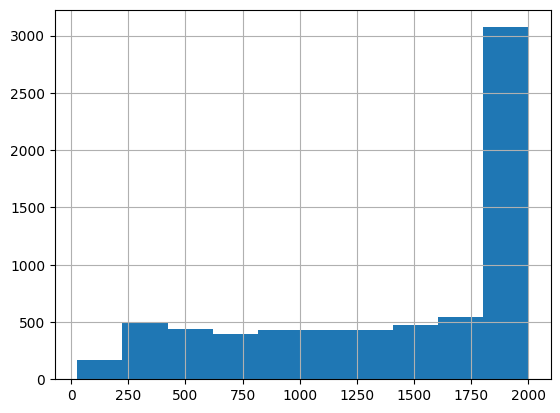

In [34]:
merged_data['Visibility'].hist()

<Axes: >

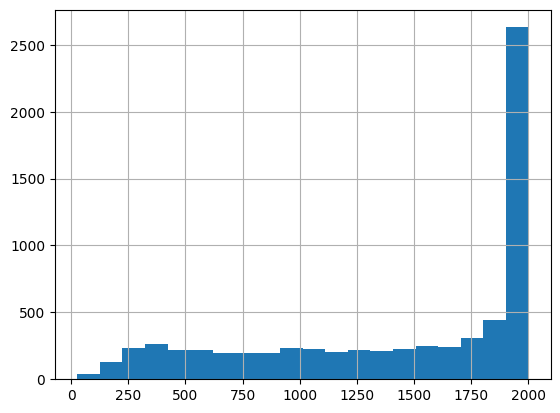

In [35]:
merged_data['Visibility'].hist(bins = 20)

In [36]:
# 이상치 식별을 위한 IQR 계산
Q1 = merged_data['Visibility'].quantile(0.25)
Q3 = merged_data['Visibility'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 식별
threshold = 1.5  # 이상치로 간주할 IQR의 범위
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = merged_data[(merged_data['Visibility'] < lower_bound) | (merged_data['Visibility'] > upper_bound)]
print("이상치:", outliers)

# 이상치 제거
merged_data = merged_data[~((merged_data['Visibility'] < lower_bound) | (merged_data['Visibility'] > upper_bound))]

# 결과 출력
print("제거 후 데이터:")
print(merged_data)

이상치: Empty DataFrame
Columns: [ID, Hour, Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar Radiation, Rainfall, Snowfall, Seasons_Autumn, Seasons_Spring, Seasons_Summer, Seasons_Winter, Holiday, Functional Hours, Rented Bike Count]
Index: []
제거 후 데이터:
        ID  Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0     6        -15.7        29         2.5        2000   
1        1    15          6.8        50         4.1         660   
2        2     6          1.1        66         0.9        1550   
3        3    11          6.0        66         0.9         573   
4        4    17         18.2        43         2.3        1925   
...    ...   ...          ...       ...         ...         ...   
7002  7002    23         12.9        78         0.6        1201   
7004  7004     0         25.9        76         1.3         984   
7005  7005     5         18.1        73         0.5        1182   
7006  7006     7         14.1        69         1.1 

#####Dew point temperature

<Axes: >

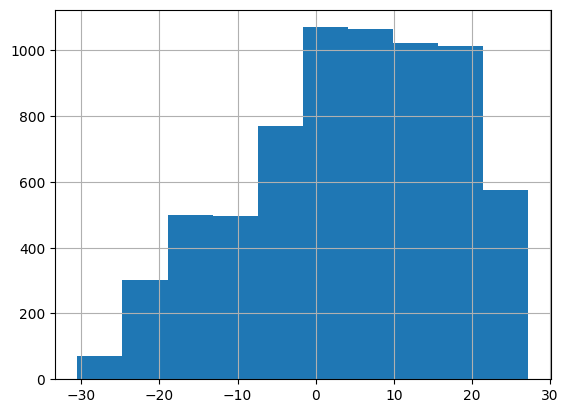

In [37]:
merged_data['Dew point temperature'].hist()

<Axes: >

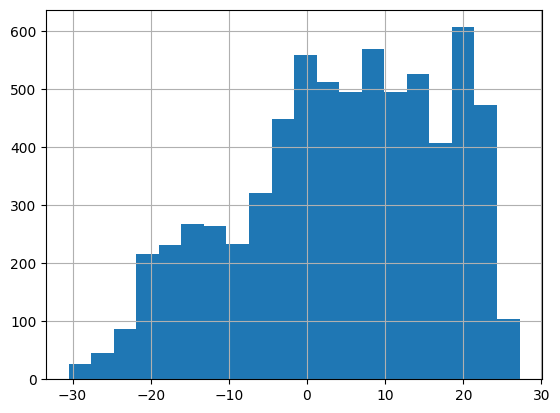

In [38]:
merged_data['Dew point temperature'].hist(bins = 20)

In [39]:
# 이상치 식별을 위한 IQR 계산
Q1 = merged_data['Dew point temperature'].quantile(0.25)
Q3 = merged_data['Dew point temperature'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 식별
threshold = 1.5  # 이상치로 간주할 IQR의 범위
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = merged_data[(merged_data['Dew point temperature'] < lower_bound) | (merged_data['Dew point temperature'] > upper_bound)]
print("이상치:", outliers)

# 이상치 제거
merged_data = merged_data[~((merged_data['Dew point temperature'] < lower_bound) | (merged_data['Dew point temperature'] > upper_bound))]

# 결과 출력
print("제거 후 데이터:")
print(merged_data)

이상치: Empty DataFrame
Columns: [ID, Hour, Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar Radiation, Rainfall, Snowfall, Seasons_Autumn, Seasons_Spring, Seasons_Summer, Seasons_Winter, Holiday, Functional Hours, Rented Bike Count]
Index: []
제거 후 데이터:
        ID  Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0     6        -15.7        29         2.5        2000   
1        1    15          6.8        50         4.1         660   
2        2     6          1.1        66         0.9        1550   
3        3    11          6.0        66         0.9         573   
4        4    17         18.2        43         2.3        1925   
...    ...   ...          ...       ...         ...         ...   
7002  7002    23         12.9        78         0.6        1201   
7004  7004     0         25.9        76         1.3         984   
7005  7005     5         18.1        73         0.5        1182   
7006  7006     7         14.1        69         1.1 

#####Solar Radiation

<Axes: >

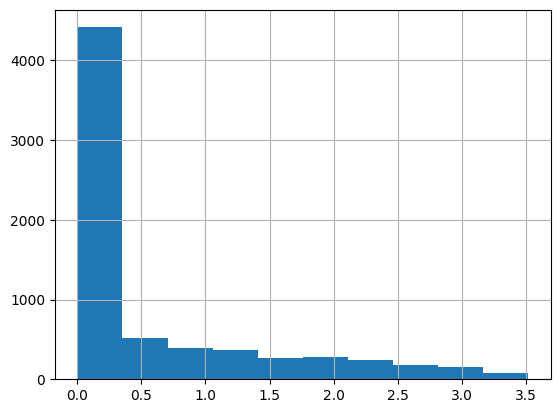

In [40]:
merged_data['Solar Radiation'].hist()

<Axes: >

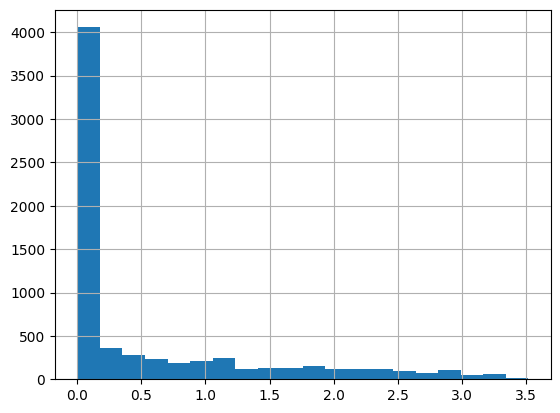

In [41]:
merged_data['Solar Radiation'].hist(bins = 20)

In [42]:
# 이상치 식별을 위한 IQR 계산
Q1 = merged_data['Solar Radiation'].quantile(0.25)
Q3 = merged_data['Solar Radiation'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 식별
threshold = 1.5  # 이상치로 간주할 IQR의 범위
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = merged_data[(merged_data['Solar Radiation'] < lower_bound) | (merged_data['Solar Radiation'] > upper_bound)]
print("이상치:", outliers)

# 이상치 제거
merged_data = merged_data[~((merged_data['Solar Radiation'] < lower_bound) | (merged_data['Solar Radiation'] > upper_bound))]

# 결과 출력
print("제거 후 데이터:")
print(merged_data)

이상치:         ID  Hour  Temperature  Humidity  Wind speed  Visibility  \
11      11    13         22.8        31         1.9        1923   
17      17    11         25.5        57         1.8         943   
30      30    13         37.9        38         2.3        1868   
45      45    16         18.8        23         4.2        1956   
77      77    11         32.9        45         2.1        1020   
...    ...   ...          ...       ...         ...         ...   
6931  6931    13         29.4        48         1.9        1942   
6936  6936    13         34.4        48         2.1        1921   
6955  6955    11         35.8        41         1.6        1795   
6976  6976    13         33.0        56         3.5        1857   
6977  6977    16         39.4        39         2.5        1897   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
11                      4.7             3.49       0.0       0.0   
17                     16.3             3.01       0.0

##### Rainfall

<Axes: >

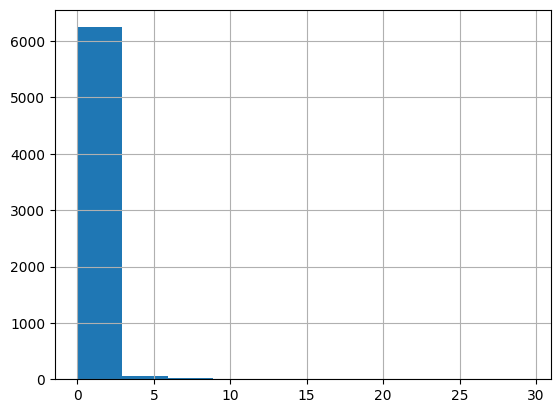

In [43]:
merged_data['Rainfall'].hist()

<Axes: >

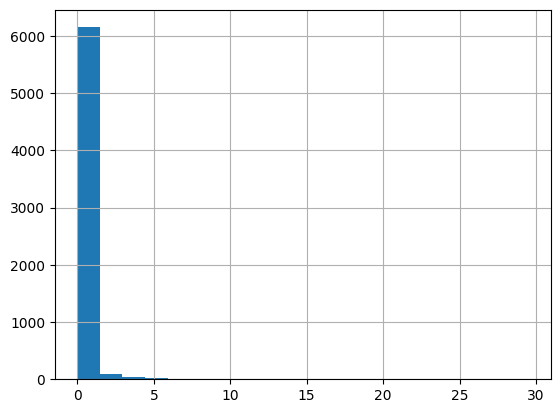

In [44]:
merged_data['Rainfall'].hist(bins = 20)

In [45]:
# 이상치 식별을 위한 IQR 계산
Q1 = merged_data['Rainfall'].quantile(0.25)
Q3 = merged_data['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 식별
threshold = 2.5  # 이상치로 간주할 IQR의 범위
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = merged_data[(merged_data['Rainfall'] < lower_bound) | (merged_data['Rainfall'] > upper_bound)]
print("이상치:", outliers)

# 이상치 제거
merged_data = merged_data[~((merged_data['Rainfall'] < lower_bound) | (merged_data['Rainfall'] > upper_bound))]

# 결과 출력
print("제거 후 데이터:")
print(merged_data)

이상치:         ID  Hour  Temperature  Humidity  Wind speed  Visibility  \
5        5    20         23.7        62         1.6        1402   
27      27     6         22.3        93         0.6        1262   
29      29     9          3.9        86         1.7         399   
37      37    14         23.3        89         1.5        1435   
48      48     9          8.8        97         1.3         196   
...    ...   ...          ...       ...         ...         ...   
6892  6892     3         16.2        94         1.7         400   
6938  6938    19         25.7        83         1.1        1011   
6958  6958     2         16.9        88         2.5        2000   
6994  6994    18         15.4        97         1.9         340   
6998  6998    16         22.2        97         1.1        1745   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
5                      15.9             0.00       0.4       0.0   
27                     21.1             0.01       0.4

<Axes: >

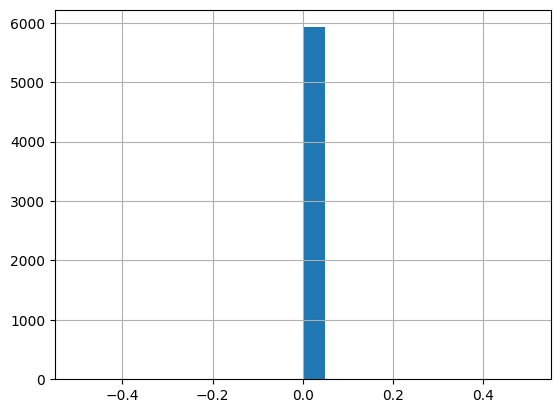

In [46]:
merged_data['Rainfall'].hist(bins = 20)

##### Snowfall

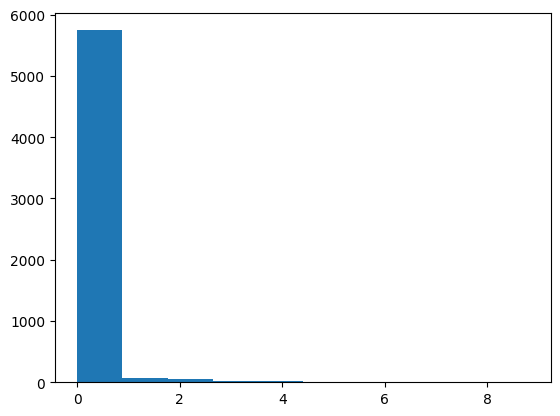

In [47]:
plt.hist(merged_data['Snowfall'])
plt.show()

<Axes: >

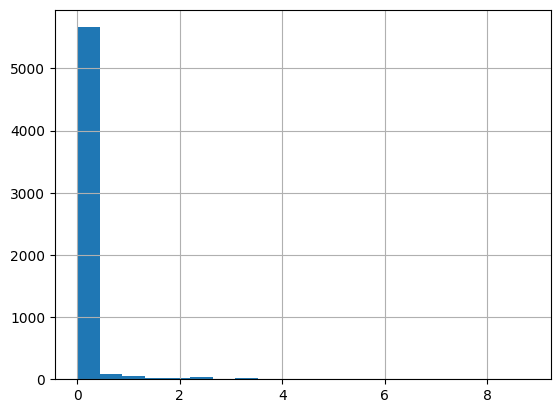

In [48]:
merged_data['Snowfall'].hist(bins = 20)

In [49]:
# 이상치 식별을 위한 IQR 계산
Q1 = merged_data['Snowfall'].quantile(0.25)
Q3 = merged_data['Snowfall'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 식별
threshold = 2.5  # 이상치로 간주할 IQR의 범위
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = merged_data[(merged_data['Snowfall'] < lower_bound) | (merged_data['Snowfall'] > upper_bound)]
print("이상치:", outliers)

# 이상치 제거
merged_data = merged_data[~((merged_data['Snowfall'] < lower_bound) | (merged_data['Snowfall'] > upper_bound))]

# 결과 출력
print("제거 후 데이터:")
print(merged_data)

이상치:         ID  Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0     6        -15.7        29         2.5        2000   
3        3    11          6.0        66         0.9         573   
49      49     7        -17.5        38         3.4        2000   
70      70    10          0.5        91         0.4         143   
101    101    14          3.0        82         1.7        1589   
...    ...   ...          ...       ...         ...         ...   
6874  6874    12        -12.2        26         4.0        2000   
6921  6921     4         -3.6        91         1.2         241   
6954  6954     8        -16.2        30         1.6        2000   
6967  6967    14          4.2        85         0.7         325   
6989  6989     9        -13.3        36         3.5        2000   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0                     -29.7             0.00       0.0       0.9   
3                       0.1             1.37       0.0

In [50]:
x_train = merged_data[['ID','Hour',  'Temperature', 'Humidity', 'Wind speed', 'Visibility', 
                      'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 
                      'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday', 'Functional Hours']]

In [51]:
y_train = merged_data['Rented Bike Count']

## EDA

In [52]:
#dtale_app.USE_COLAB = True

#dtale.show(x_train)

In [53]:
#dtale.show(y_train)

In [54]:
#dtale.show(merged_data)

In [55]:
# 정규화 객체 생성
#scaler = MinMaxScaler()

In [56]:
# 데이터 정규화
#scaled_result = scaler.fit_transform(result)

In [186]:
#dtale.show(scaled_result)

# Modeling

In [187]:
# 학습 데이터와 테스트 데이터 분리
x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state = 42)

In [188]:
# 앙상블 모델 정의
models = [
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    xgb.XGBRegressor(random_state=42),
    lgb.LGBMRegressor(random_state=42)
]

# 각 모델 훈련 및 검증
predictions = []
for model in models:
    model.fit(x_trn, y_trn)
    pred = model.predict(x_val)
    predictions.append(pred)

# 앙상블 예측 (예시로 각 모델의 결과를 단순 평균)
ensemble_pred = np.mean(predictions, axis=0)

# 검증 데이터에 대한 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_val, ensemble_pred))
print("Ensemble RMSE:", rmse) 

Ensemble RMSE: 232.09967174845076


In [189]:
 x_train.shape

(5613, 16)

In [190]:
y_train.shape

(5613,)

In [191]:
y_train

1        545
2        108
4       1990
6        173
7       1303
        ... 
7002     950
7004    1068
7005     282
7006     786
7007    2183
Name: Rented Bike Count, Length: 5613, dtype: int64

# Submission

In [192]:
print(y_train.shape)      # 데이터프레임의 크기 출력

(5613,)


In [194]:
result = pd.DataFrame(ensemble_pred, columns=['Rented Bike Count'])
result.index.name = 'ID'
result.to_csv('submission.csv', index_label='ID')